In [2]:
#Dataset: https://www.kaggle.com/datasets/paramaggarwal/fashion-product-images-small

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


C:\Users\ASHMITA\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [6]:
df= pd.read_csv("styles.csv")
custom_palette = "viridis"
df.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,usage,productDisplayName,colorgroup
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,Casual,Turtle Check Men Navy Blue Shirt,Blue
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,Casual,Peter England Men Party Blue Jeans,Blue
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,Casual,Titan Women Silver Watch,Grey
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,Casual,Manchester United Men Solid Black Track Pants,Black
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,Casual,Puma Men Grey T-shirt,Grey


In [59]:
df.columns

Index(['id', 'gender', 'masterCategory', 'subCategory', 'articleType',
       'baseColour', 'season', 'usage', 'productDisplayName'],
      dtype='object')

In [60]:
data = pd.read_csv('styles.csv')
print("Original Data:")
print(data.head())

Original Data:
      id gender masterCategory subCategory  articleType baseColour  season  \
0  15970    Men        Apparel     Topwear       Shirts  Navy Blue    Fall   
1  39386    Men        Apparel  Bottomwear        Jeans       Blue  Summer   
2  59263  Women    Accessories     Watches      Watches     Silver  Winter   
3  21379    Men        Apparel  Bottomwear  Track Pants      Black    Fall   
4  53759    Men        Apparel     Topwear      Tshirts       Grey  Summer   

    usage                             productDisplayName colorgroup  
0  Casual               Turtle Check Men Navy Blue Shirt       Blue  
1  Casual             Peter England Men Party Blue Jeans       Blue  
2  Casual                       Titan Women Silver Watch       Grey  
3  Casual  Manchester United Men Solid Black Track Pants      Black  
4  Casual                          Puma Men Grey T-shirt       Grey  


## Data preprocessing

In [124]:
#filtering out unwanted unique values from the masterCategory and subCategory column:
master_categories_to_remove = ['Personal Care', 'Free Items', 'Home']
sub_categories_to_remove = ['Innerwear', 'Fragrance', 'Lips', 'Loungewear and Nightwear', 'Nails', 'Makeup',
                            'Free Gifts', 'Skin Care', 'Bath and Body', 'Water Bottle', 'Perfumes', 'Umbrellas', 
                            'Home Furnishing', 'Vouchers', 'Sports Equipment', 'Shoe Accessories', 'Sports Accessories']

cleaned_df = data[
    (~data['masterCategory'].isin(master_categories_to_remove)) &
    (~data['subCategory'].isin(sub_categories_to_remove))
]
print("Filtered Data (masterCategory):")
print(cleaned_df['masterCategory'].value_counts())
print("\nFiltered Data (subCategory):")
print(cleaned_df['subCategory'].value_counts())

cleaned_df.to_csv('styles.csv', index=False)

#verify
reloaded_df = pd.read_csv('styles.csv')
print("\nReloaded Data (masterCategory):")
print(reloaded_df['masterCategory'].value_counts())
print("\nReloaded Data (subCategory):")
print(reloaded_df['subCategory'].value_counts())

Filtered Data (masterCategory):
Apparel           19122
Accessories       11248
Footwear           9222
Sporting Goods        4
Name: masterCategory, dtype: int64

Filtered Data (subCategory):
Topwear        15405
Shoes           7344
Bags            3055
Bottomwear      2694
Watches         2542
Jewellery       1080
Eyewear         1073
Sandal           963
Wallets          933
Flip Flops       915
Belts            811
Socks            698
Dress            478
Saree            427
Headwear         293
Ties             258
Accessories      143
Scarves          118
Cufflinks        108
Apparel Set      106
Stoles            90
Mufflers          38
Gloves            20
Wristbands         4
Name: subCategory, dtype: int64

Reloaded Data (masterCategory):
Apparel           19122
Accessories       11248
Footwear           9222
Sporting Goods        4
Name: masterCategory, dtype: int64

Reloaded Data (subCategory):
Topwear        15405
Shoes           7344
Bags            3055
Bottomwear    

In [125]:
df.shape

(39569, 9)

In [126]:
df.info

<bound method DataFrame.info of           id  gender masterCategory subCategory articleType baseColour  \
11524   1163     Men        Apparel     Topwear     Tshirts       Blue   
11266   1164     Men        Apparel     Topwear     Tshirts       Blue   
14636   1165     Men        Apparel     Topwear     Tshirts       Blue   
8208    1525  Unisex    Accessories        Bags   Backpacks  Navy Blue   
29630   1526  Unisex    Accessories        Bags   Backpacks      Black   
...      ...     ...            ...         ...         ...        ...   
14791  59995   Women        Apparel       Dress     Dresses      Black   
33029  59996   Women        Apparel       Dress     Dresses     Purple   
32449  59998   Women       Footwear       Shoes       Heels      Multi   
30968  59999   Women       Footwear       Shoes       Heels     Bronze   
5769   60000   Women        Apparel     Topwear      Kurtas       Blue   

       season   usage                                productDisplayName  
11524

In [127]:
df.dtypes

id                     int64
gender                object
masterCategory        object
subCategory           object
articleType           object
baseColour            object
season                object
usage                 object
productDisplayName    object
dtype: object

Observation: Only id is numerical feature rest categorical data features.

In [128]:
df.isnull().sum()

id                    0
gender                0
masterCategory        0
subCategory           0
articleType           0
baseColour            0
season                0
usage                 0
productDisplayName    0
dtype: int64

In [129]:
[features for features in df.columns if df[features].isnull().sum()>0]

[]

In [130]:
features_null=[features for features in df.columns if df[features].isnull().sum()>1]

for feature in features_null:
    print(feature, np.round(df[feature].isnull().mean(), 4),  ' % missing values')

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5]),
 [Text(0.5, 0, 'id'),
  Text(1.5, 0, 'gender'),
  Text(2.5, 0, 'masterCategory'),
  Text(3.5, 0, 'subCategory'),
  Text(4.5, 0, 'articleType'),
  Text(5.5, 0, 'baseColour'),
  Text(6.5, 0, 'season'),
  Text(7.5, 0, 'usage'),
  Text(8.5, 0, 'productDisplayName')])

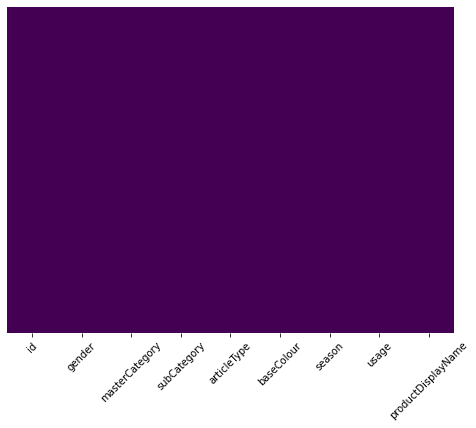

In [131]:
plt.figure(figsize=(8,6))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.xticks(rotation=45)

In [132]:
df.dropna(inplace=True)

In [133]:
df.isnull().sum()

id                    0
gender                0
masterCategory        0
subCategory           0
articleType           0
baseColour            0
season                0
usage                 0
productDisplayName    0
dtype: int64

In [134]:
df.sort_values('id', inplace=True)

In [135]:
df.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,usage,productDisplayName
11524,1163,Men,Apparel,Topwear,Tshirts,Blue,Summer,Sports,Nike Sahara Team India Fanwear Round Neck Jersey
11266,1164,Men,Apparel,Topwear,Tshirts,Blue,Winter,Sports,Nike Men Blue T20 Indian Cricket Jersey
14636,1165,Men,Apparel,Topwear,Tshirts,Blue,Summer,Sports,Nike Mean Team India Cricket Jersey
8208,1525,Unisex,Accessories,Bags,Backpacks,Navy Blue,Fall,Casual,Puma Deck Navy Blue Backpack
29630,1526,Unisex,Accessories,Bags,Backpacks,Black,Fall,Sports,Puma Big Cat Backpack Black


In [136]:
df.gender.value_counts()

Men       20390
Women     15605
Unisex     2098
Boys        826
Girls       650
Name: gender, dtype: int64

<AxesSubplot:xlabel='gender', ylabel='count'>

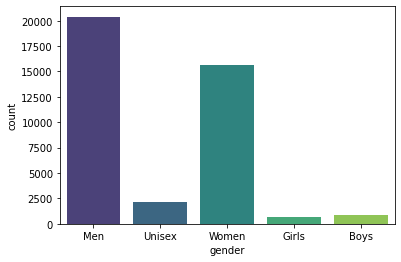

In [137]:
sns.countplot(x="gender", data=df,palette=custom_palette)

Observation: Mostly Men and Women followed by Unisex, Boys and Girls.

In [138]:
df.masterCategory.value_counts()

Apparel           19099
Accessories       11245
Footwear           9200
Sporting Goods       25
Name: masterCategory, dtype: int64

<AxesSubplot:xlabel='masterCategory', ylabel='count'>

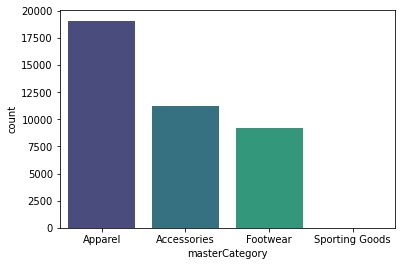

In [139]:
sns.countplot(x="masterCategory", data=df,palette=custom_palette)

Observation: Mostly Apparel followed by Accesories and Footwear.

In [140]:
df.subCategory.value_counts()

Topwear               15390
Shoes                  7324
Bags                   3053
Bottomwear             2686
Watches                2542
Jewellery              1080
Eyewear                1073
Sandal                  961
Wallets                 925
Flip Flops              915
Belts                   811
Socks                   698
Dress                   478
Saree                   427
Headwear                293
Ties                    258
Accessories             143
Scarves                 118
Cufflinks               108
Apparel Set             106
Stoles                   90
Mufflers                 38
Sports Equipment         21
Gloves                   20
Wristbands                4
Shoe Accessories          4
Sports Accessories        3
Name: subCategory, dtype: int64

<AxesSubplot:xlabel='subCategory', ylabel='count'>

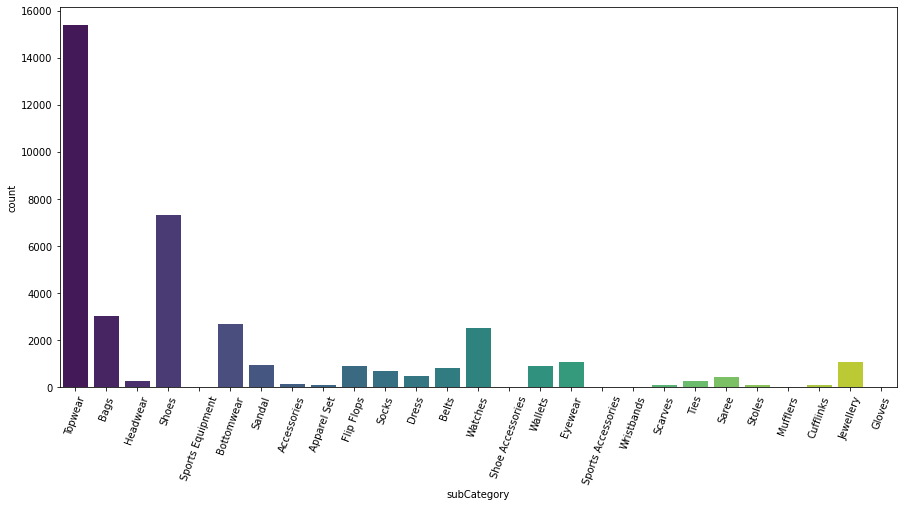

In [141]:
plt.figure(figsize=(15, 7))
plt.xticks(rotation=70)
sns.countplot(x="subCategory", data=df,palette=custom_palette)

Observation: Top-3 subCategory are: 
1. Topwear
2. Shoes
3. Bags

In [78]:
df.articleType.value_counts()

Tshirts               7069
Shirts                3214
Casual Shoes          2846
Watches               2542
Sports Shoes          2016
                      ... 
Ties and Cufflinks       2
Key chain                2
Suits                    1
Shoe Laces               1
Hair Accessory           1
Name: articleType, Length: 92, dtype: int64

<AxesSubplot:xlabel='articleType', ylabel='count'>

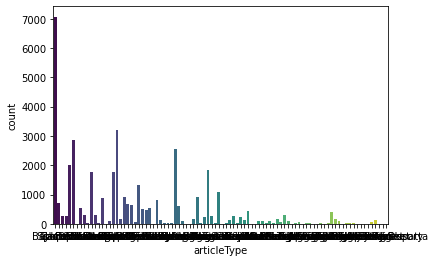

In [79]:
sns.countplot(x="articleType", data=df,palette=custom_palette)

Observation: There are about 92 unique articleType present in our dataset.

In [80]:
#top_10_articletype
aType_10= df['articleType'].value_counts().head(10).index
aType_df_10 = df[df['articleType'].isin(aType_10)]

<AxesSubplot:xlabel='articleType', ylabel='count'>

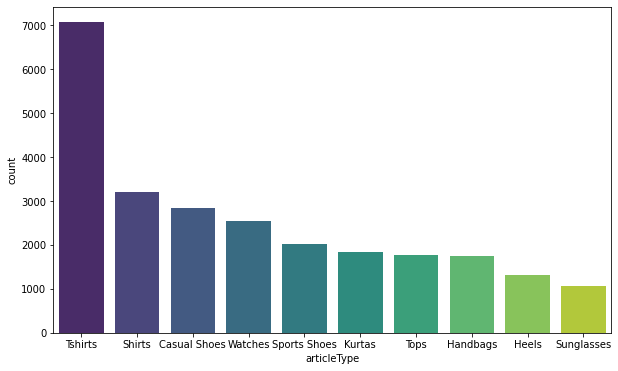

In [81]:
plt.figure(figsize=(10,6))
sns.countplot(x="articleType", data=aType_df_10, order=aType_10,palette=custom_palette)

Observation: Top-3 articleType are:
1. Tshirts
2. Shirts
3. Casual Shoes

In [182]:
df.baseColour.unique()

array(['Navy Blue', 'Blue', 'Silver', 'Black', 'Grey', 'Green', 'Purple',
       'White', 'Brown', 'Bronze', 'Teal', 'Copper', 'Pink', 'Off White',
       'Beige', 'Red', 'Khaki', 'Orange', 'Coffee Brown', 'Yellow',
       'Charcoal', 'Steel', 'Gold', 'Tan', 'Magenta', 'Lavender',
       'Sea Green', 'Cream', 'Peach', 'Olive', 'Burgundy', 'Rust',
       'Multi', 'Maroon', 'Grey Melange', 'Turquoise Blue', 'Metallic',
       'Mustard', 'Taupe', 'Mushroom Brown', 'Mauve', nan, 'Nude',
       'Fluorescent Green', 'Lime Green', 'Rose', 'Skin'], dtype=object)

<AxesSubplot:xlabel='baseColour', ylabel='count'>

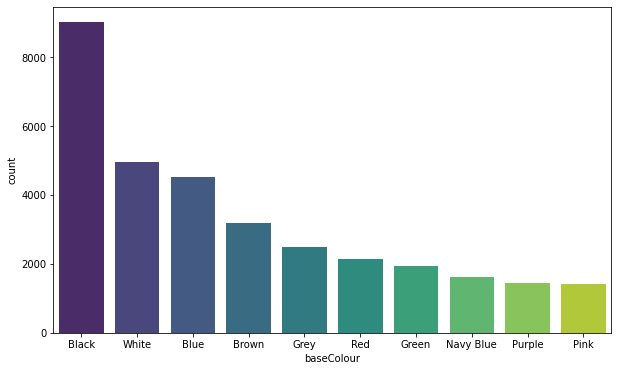

In [183]:
bcol_10= df['baseColour'].value_counts().head(10).index
bcol_df_10 = df[df['baseColour'].isin(bcol_10)]
plt.figure(figsize=(10, 6))
sns.countplot(x="baseColour", data=bcol_df_10, order=bcol_10, palette=custom_palette)

In [184]:
# Color grouping
df = pd.read_csv('styles.csv')

# Color grouping mapping dictionary
color_mapping = {
    'Navy Blue': 'Blue', 
    'Blue': 'Blue', 
    'Teal': 'Blue', 
    'Turquoise Blue': 'Blue',

    'Silver': 'Grey', 
    'Grey': 'Grey', 
    'Grey Melange': 'Grey', 
    'Steel': 'Grey',

    'Black': 'Black', 
    'Charcoal': 'Black',

    'Green': 'Green', 
    'Olive': 'Green', 
    'Lime Green': 'Green', 
    'Fluorescent Green': 'Green', 
    'Sea Green': 'Green',

    'Purple': 'Purple', 
    'Magenta': 'Purple', 
    'Lavender': 'Purple', 
    'Mauve': 'Purple',

    'White': 'White', 
    'Off White': 'White', 
    'Cream': 'White', 
    'Skin': 'White',

    'Beige': 'Brown', 
    'Brown': 'Brown', 
    'Coffee Brown': 'Brown', 
    'Tan': 'Brown', 
    'Khaki': 'Brown', 
    'Mushroom Brown': 'Brown', 
    'Nude': 'Brown',

    'Gold': 'Metallic', 
    'Bronze': 'Metallic', 
    'Copper': 'Metallic', 
    'Metallic': 'Metallic',

    'Red': 'Red', 
    'Burgundy': 'Red', 
    'Rose': 'Red',

    'Pink': 'Pink', 
    'Peach': 'Pink',

    'Yellow': 'Yellow', 
    'Mustard': 'Yellow', 
    'Taupe': 'Yellow',

    'Orange': 'Orange',

    'Maroon': 'Red', 
    'Rust': 'Brown', 
    'Multi': 'Multi', 
}

df['colorgroup'] = df['baseColour'].map(color_mapping)

#verify
print(df.head())
df.to_csv('styles.csv', index=False)

      id gender masterCategory subCategory  articleType baseColour  season  \
0  15970    Men        Apparel     Topwear       Shirts  Navy Blue    Fall   
1  39386    Men        Apparel  Bottomwear        Jeans       Blue  Summer   
2  59263  Women    Accessories     Watches      Watches     Silver  Winter   
3  21379    Men        Apparel  Bottomwear  Track Pants      Black    Fall   
4  53759    Men        Apparel     Topwear      Tshirts       Grey  Summer   

    usage                             productDisplayName colorgroup  
0  Casual               Turtle Check Men Navy Blue Shirt       Blue  
1  Casual             Peter England Men Party Blue Jeans       Blue  
2  Casual                       Titan Women Silver Watch       Grey  
3  Casual  Manchester United Men Solid Black Track Pants      Black  
4  Casual                          Puma Men Grey T-shirt       Grey  


In [5]:
df = df[['id', 'gender', 'masterCategory','subCategory', 'articleType', 'baseColour', 'colorgroup', 'season', 'usage', 'productDisplayName']]
df.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,colorgroup,season,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Blue,Fall,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Blue,Summer,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Grey,Winter,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Black,Fall,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Grey,Summer,Casual,Puma Men Grey T-shirt


In [186]:
df.colorgroup.value_counts()

Black       9173
Blue        6312
White       5443
Brown       4215
Grey        3872
Red         2642
Green       2354
Purple      1663
Pink        1535
Yellow       830
Metallic     732
Orange       456
Multi        363
Name: colorgroup, dtype: int64

<AxesSubplot:xlabel='colorgroup', ylabel='count'>

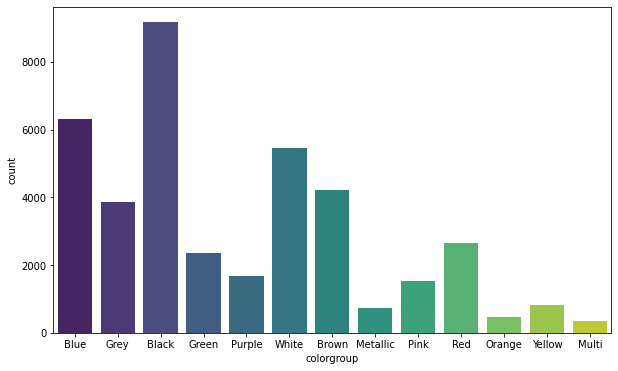

In [187]:
plt.figure(figsize=(10, 6))
sns.countplot(x='colorgroup', data=df, palette='viridis')

In [188]:
season_counts = df['season'].value_counts()

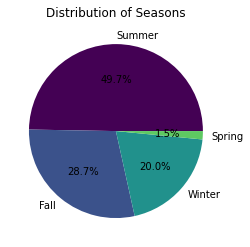

In [189]:
cmap = plt.get_cmap(custom_palette)
num_categories = len(season_counts)
colors = [cmap(i / num_categories) for i in range(num_categories)]
plt.pie(season_counts, labels=season_counts.index, autopct='%1.1f%%', colors=colors)
plt.title('Distribution of Seasons')
plt.show()

In [190]:
usage_counts = df['usage'].value_counts()

<AxesSubplot:xlabel='usage', ylabel='count'>

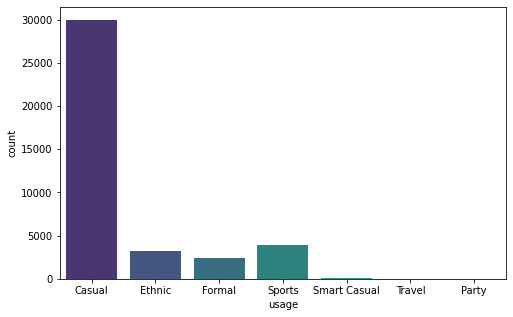

In [191]:
plt.figure(figsize=(8,5))
sns.countplot(x='usage', data=df, palette='viridis')

In [192]:
df.productDisplayName.value_counts()

Lucera Women Silver Earrings                       82
Lucera Women Silver Pendant                        56
Lucera Women Silver Ring                           50
Catwalk Women Black Heels                          48
Q&Q Men Black Dial Watch                           42
                                                   ..
Sepia Women Oxygen Blue Top                         1
Fila Men Black Speed Lite Shoes                     1
Angry Birds Women Coral T-shirt                     1
Esprit Men Axis Black Steel Watches                 1
Fossil Women Pink Dial Chronograph Watch ES3050     1
Name: productDisplayName, Length: 27076, dtype: int64

In [193]:
pname_10= df['productDisplayName'].value_counts().head(10).index
pname_df_10 = df[df['productDisplayName'].isin(pname_10)]

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Lucera Women Silver Earrings'),
  Text(1, 0, 'Lucera Women Silver Pendant'),
  Text(2, 0, 'Lucera Women Silver Ring'),
  Text(3, 0, 'Catwalk Women Black Heels'),
  Text(4, 0, 'Q&Q Men Black Dial Watch'),
  Text(5, 0, 'Fastrack Men Black Dial Watch'),
  Text(6, 0, 'Fabindia Women Anusuya Silver Earrings'),
  Text(7, 0, 'Maxima Men White Dial Watch'),
  Text(8, 0, 'FNF Multi Coloured Printed Sari'),
  Text(9, 0, 'Coolers Men Black Sandals')])

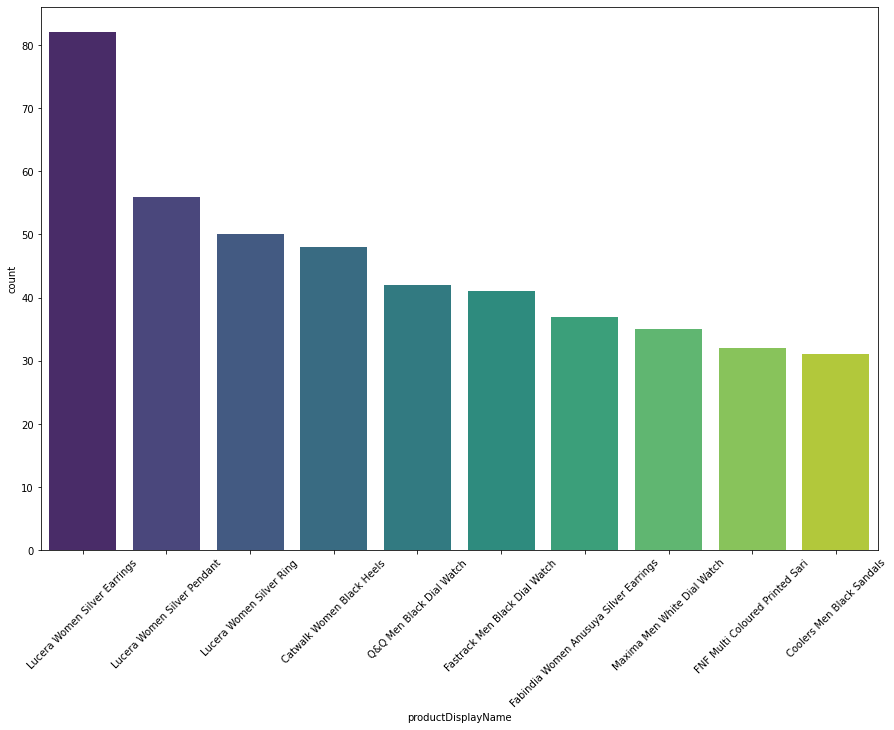

In [194]:
plt.figure(figsize=(15,10))
sns.countplot(x="productDisplayName", data=pname_df_10, order=pname_10,palette='viridis')
plt.xticks(rotation=45)

## Image Processing

In [8]:
import pandas as pd
import os
df = pd.read_csv('styles.csv', delimiter=',', on_bad_lines='skip')
df['imagePath'] = './images/' + df['id'].astype(str) + '.jpg'
def image_exists(image_path):
    return os.path.exists(image_path)
df['image_exists'] = df['imagePath'].apply(image_exists)
missing_images = df[df['image_exists'] == False]
print("Rows with missing images:")
print(missing_images)
print(f"Number of missing images: {missing_images.shape[0]}")

Rows with missing images:
          id gender masterCategory subCategory articleType baseColour  season  \
5941   39403    Men        Apparel     Topwear      Shirts      Black  Summer   
14484  39410    Men        Apparel     Topwear      Shirts      Cream  Summer   
28782  39401    Men        Apparel  Bottomwear       Jeans       Blue  Winter   
32464  39425    Men        Apparel     Topwear     Tshirts        Red  Spring   
35694  12347    Men        Apparel     Topwear       Suits        Red  Winter   

        usage                                 productDisplayName colorgroup  \
5941   Casual  U.S. Polo Assn. Men Black Tailored Fit Casual ...      Black   
14484  Casual  U.S. Polo Assn. Men Cream-Coloured Tailored Fi...      White   
28782  Casual  U.S. Polo Assn. Denim Co. Men Blue Slim Straig...       Blue   
32464  Casual               U.S. Polo Assn. Men Red Polo T-Shirt        Red   
35694  Casual  Fastrack Men Red Manhattan Regular Fit Solid F...        Red   

            

In [9]:
df_with_images = df[df['image_exists']]
df_with_images.reset_index(drop=True, inplace=True)
print("Cleaned DataFrame:")
print(df_with_images)
df_with_images.to_csv('styles.csv', index=False)

Cleaned DataFrame:
          id gender masterCategory subCategory   articleType baseColour  \
0      15970    Men        Apparel     Topwear        Shirts  Navy Blue   
1      39386    Men        Apparel  Bottomwear         Jeans       Blue   
2      59263  Women    Accessories     Watches       Watches     Silver   
3      21379    Men        Apparel  Bottomwear   Track Pants      Black   
4      53759    Men        Apparel     Topwear       Tshirts       Grey   
...      ...    ...            ...         ...           ...        ...   
39586  42234  Women        Apparel     Topwear          Tops       Blue   
39587  17036    Men       Footwear       Shoes  Casual Shoes      White   
39588   6461    Men       Footwear  Flip Flops    Flip Flops        Red   
39589  18842    Men        Apparel     Topwear       Tshirts       Blue   
39590  51623  Women    Accessories     Watches       Watches       Pink   

       season   usage                               productDisplayName  \
0     

## EDA

In [195]:
#for apparels:
#apparel with season, gender count.
apparel_df = df[df['masterCategory'] == 'Apparel']
df.groupby(['season', "gender"]).size().reset_index(name='Count')

,season,gender,Count
0,Fall,Boys,113
1,Fall,Girls,81
2,Fall,Men,7073
3,Fall,Unisex,476
4,Fall,Women,3632
5,Spring,Boys,6
6,Spring,Girls,3
7,Spring,Men,386
8,Spring,Unisex,84
9,Spring,Women,130


<AxesSubplot:xlabel='season', ylabel='Count'>

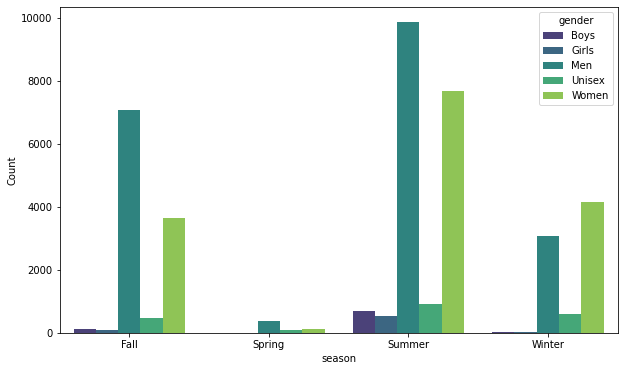

In [196]:
grp_df=df.groupby(['season', "gender"]).size().reset_index(name='Count')
plt.figure(figsize=(10, 6))
sns.barplot(data=grp_df, x='season', y='Count', hue='gender', palette="viridis")

Observation: Mostly men apparel in more count for every season.

In [5]:
#articletype with usage & season
df.groupby(['articleType','usage','season']).size().reset_index().rename(columns={0:'Count'})

,articleType,usage,season,Count
0,Accessory Gift Set,Casual,Summer,21
1,Accessory Gift Set,Formal,Fall,49
2,Accessory Gift Set,Formal,Winter,41
3,Backpacks,Casual,Fall,118
4,Backpacks,Casual,Spring,41
...,...,...,...,...
430,Water Bottle,Casual,Fall,2
431,Water Bottle,Casual,Summer,1
432,Water Bottle,Sports,Fall,1
433,Wristbands,Casual,Fall,1


In [7]:
g_df = df.groupby(['articleType', 'usage', 'season']).size().reset_index(name='Count')
articletype_counts = df['articleType'].value_counts()
top_articletypes = articletype_counts.head(5).index
articletype_counts.head(5)


Tshirts         7070
Shirts          3217
Casual Shoes    2846
Watches         2542
Sports Shoes    2036
Name: articleType, dtype: int64

<AxesSubplot:xlabel='Count', ylabel='usage'>

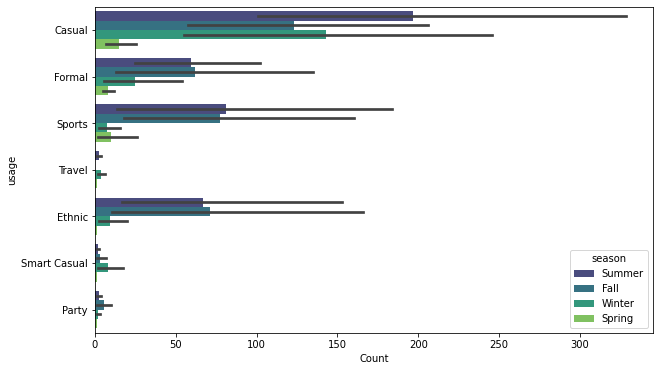

In [8]:
plt.figure(figsize=(10,6))
sns.barplot(data=g_df, x='Count', y='usage', hue='season', palette='viridis')

Observation: Tshirts lead the articleType.


Pivot Table:
colorgroup   Black    Blue  Green   Pink    Red   White
gender                                                 
Boys           0.0   188.0    0.0    0.0  104.0   156.0
Girls          0.0   119.0    0.0  147.0    0.0   105.0
Men         1735.0  2784.0    0.0    0.0    0.0  1482.0
Unisex        15.0    26.0   14.0    0.0    0.0     0.0
Women       1037.0  1344.0    0.0    0.0    0.0  1056.0


<Figure size 720x432 with 0 Axes>

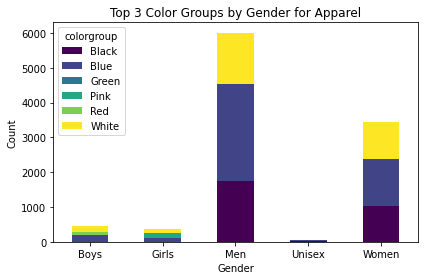

In [219]:
grp_df = apparel_df.groupby(['colorgroup', 'gender']).size().reset_index(name='Count')
grp_df['Rank'] = grp_df.groupby('gender')['Count'].rank(ascending=False, method='dense')

# Filter for the top 3
top_3 = grp_df[grp_df['Rank'] <= 3]
pivot_table = top_3.pivot(index='gender', columns='colorgroup', values='Count').fillna(0)
print("\nPivot Table:")
print(pivot_table)

# Plotting
plt.figure(figsize=(10, 6))
pivot_table.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Top 3 Color Groups by Gender for Apparel')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='colorgroup')
plt.show()

Observation: Top-3 colour of Colorgroup are:
1. Blue
2. Black
3. White


Pivot Table:
baseColour   Black    Blue  Green   Pink   Red   White
gender                                                
Boys           0.0   139.0    0.0    0.0  96.0   153.0
Girls          0.0    91.0    0.0  135.0   0.0    99.0
Men         1642.0  1954.0    0.0    0.0   0.0  1358.0
Unisex        15.0    24.0   13.0    0.0   0.0     0.0
Women       1014.0  1055.0    0.0    0.0   0.0   815.0


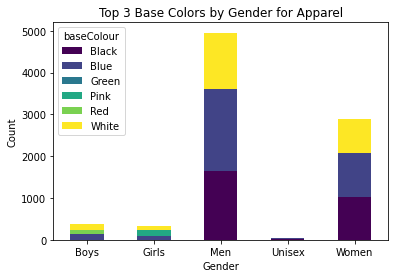

In [209]:
#apparel with baseColour and gender
apparel_df = df[df['masterCategory'] == 'Apparel']
grp_df = apparel_df.groupby(['baseColour', 'gender']).size().reset_index(name='Count')
grp_df['Rank'] = grp_df.groupby('gender')['Count'].rank(ascending=False, method='dense')

# Filter for the top 3
top_3 = grp_df[grp_df['Rank'] <= 3]
pivot_table = top_3.pivot(index='gender', columns='baseColour', values='Count').fillna(0)
print("\nPivot Table:")
print(pivot_table)

# Plotting
pivot_table.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Top 3 Base Colors by Gender for Apparel')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='baseColour')
plt.show()

Observation: Top-3 colour of BaseColor are:

1. Blue
2. Black
3. White

In [147]:
#accessories, usage-casual in respect to gender.
accessories_df = df[df['masterCategory'] == 'Accessories']
casual_accessories_df = accessories_df[accessories_df['usage'] == 'Casual']
casual_accessories_df.groupby(['gender']).size().reset_index(name='Count')

,gender,Count
0,Boys,16
1,Girls,25
2,Men,3729
3,Unisex,1254
4,Women,5061


In [148]:
casual_accessories_df.shape[0]

10085

<AxesSubplot:xlabel='gender', ylabel='Count'>

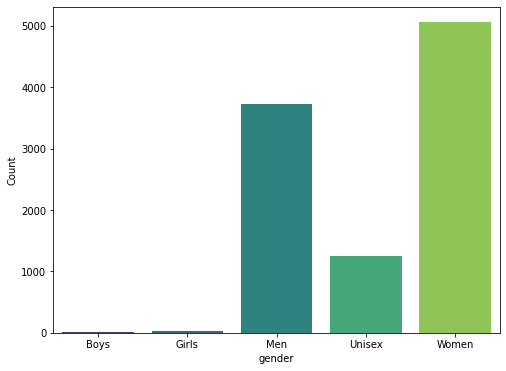

In [149]:
grp_df=casual_accessories_df.groupby(['gender']).size().reset_index(name='Count')
plt.figure(figsize=(8, 6))
sns.barplot(data=grp_df, x='gender', y='Count', palette="viridis")

Observation: Mostly casual accessories in women followed by men.

<AxesSubplot:xlabel='season', ylabel='Count'>

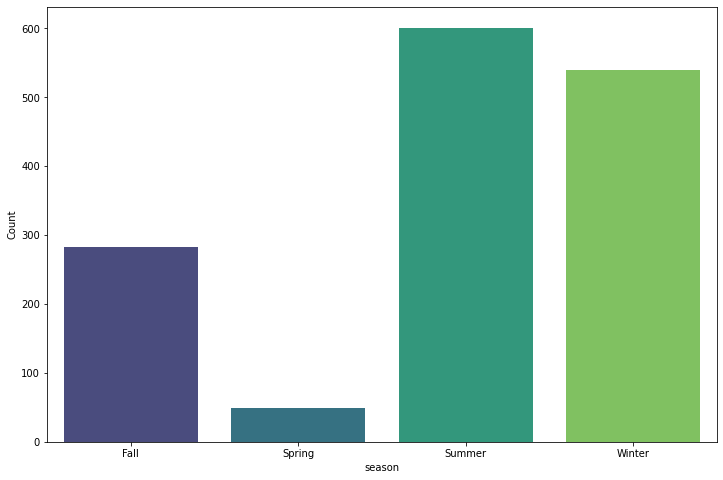

In [150]:
#unisex-accessories,gender,season
unisex_accessories_df = accessories_df[accessories_df['gender'] == 'Unisex']
grp_df=unisex_accessories_df.groupby(['season']).size().reset_index(name='Count')
plt.figure(figsize=(12, 8))
sns.barplot(data=grp_df, x='season', y='Count', palette="viridis")

Observation: Mostly unisex-accessories in summer followed by winter.

In [153]:
#accessories, usage-formal in respect to gender.
accessories_df = df[df['masterCategory'] == 'Accessories']
formal_accessories_df = accessories_df[accessories_df['usage'] == 'Formal']
formal_accessories_df.groupby(['gender']).size().reset_index(name='Count')

,gender,Count
0,Men,521
1,Unisex,1
2,Women,5


In [154]:
formal_accessories_df.shape[0]

527

<AxesSubplot:xlabel='gender', ylabel='Count'>

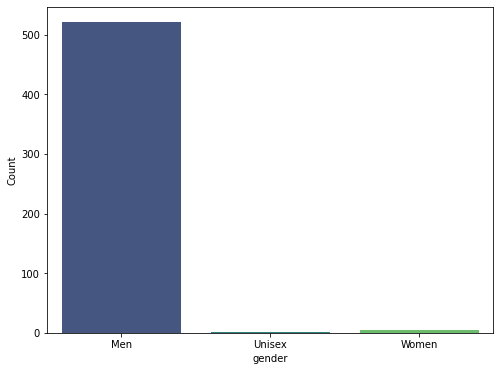

In [155]:
grp_df=formal_accessories_df.groupby(['gender']).size().reset_index(name='Count')
plt.figure(figsize=(8, 6))
sns.barplot(data=grp_df, x='gender', y='Count', palette="viridis")

Observation: Mostly formal-accessories worn by men.

In [220]:
#unisex-accessories with subcategory
unisex_accessories_df.groupby(['subCategory']).size().reset_index(name='Count')

,subCategory,Count
0,Accessories,22
1,Bags,891
2,Belts,9
3,Eyewear,150
4,Gloves,1
5,Headwear,152
6,Mufflers,1
7,Scarves,5
8,Shoe Accessories,4
9,Socks,71


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'Accessories'),
  Text(1, 0, 'Bags'),
  Text(2, 0, 'Belts'),
  Text(3, 0, 'Eyewear'),
  Text(4, 0, 'Gloves'),
  Text(5, 0, 'Headwear'),
  Text(6, 0, 'Mufflers'),
  Text(7, 0, 'Scarves'),
  Text(8, 0, 'Shoe Accessories'),
  Text(9, 0, 'Socks'),
  Text(10, 0, 'Sports Accessories'),
  Text(11, 0, 'Wallets'),
  Text(12, 0, 'Watches')])

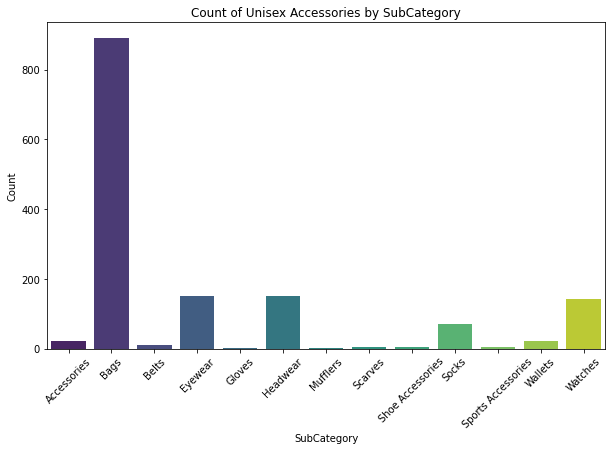

In [221]:
df_group=unisex_accessories_df.groupby(['subCategory']).size().reset_index(name='Count')
plt.figure(figsize=(10, 6))
sns.barplot(data=df_group, x='subCategory', y='Count', palette="viridis")
plt.xlabel('SubCategory')
plt.ylabel('Count')
plt.title('Count of Unisex Accessories by SubCategory')
plt.xticks(rotation=45)

Observation: Most unisex-accessories by subCategory are:
1. Bags
2. Eyewear
3. Headwear

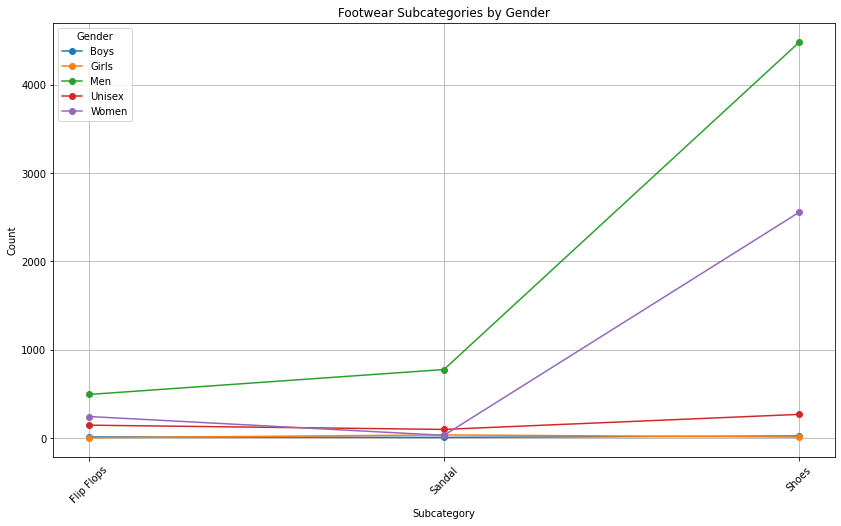

In [224]:
#footwear with subcategory and gender
footwear_df = df[df['masterCategory'] == 'Footwear']
grp_df = footwear_df.groupby(['subCategory', 'gender']).size().reset_index(name='Count')
pivot_table = grp_df.pivot(index='subCategory', columns='gender', values='Count').fillna(0)

plt.figure(figsize=(14, 8))
for gender in pivot_table.columns:
    plt.plot(pivot_table.index, pivot_table[gender], marker='o', label=gender)
plt.title('Footwear Subcategories by Gender')
plt.xlabel('Subcategory')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.grid(True)
plt.show()

Observation:Shoes are most worn footwear in almost every gender.

In [168]:
#articleType with usage-formal and gender
formal_df = df[df['usage'] == 'Formal']
formal_df.groupby(['articleType', 'gender']).size().reset_index(name='Count')

,articleType,gender,Count
0,Accessory Gift Set,Men,90
1,Belts,Men,137
2,Blazers,Men,5
3,Blazers,Women,2
4,Casual Shoes,Men,13
5,Casual Shoes,Women,1
6,Cufflinks,Men,43
7,Dresses,Women,2
8,Flats,Women,1
9,Formal Shoes,Men,607


In [169]:
grouped = formal_df.groupby(['articleType', 'gender']).size().unstack(fill_value=0)
top_10_article_types = grouped.sum(axis=1).sort_values(ascending=False).head(10).index
top_10_grouped = grouped.loc[top_10_article_types]

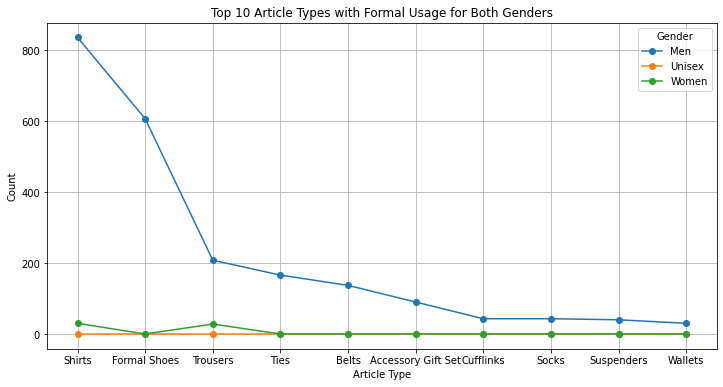

In [170]:
plt.figure(figsize=(12, 6))
for gender in top_10_grouped.columns:
    plt.plot(top_10_grouped.index, top_10_grouped[gender], marker='o', label=gender)
plt.xlabel('Article Type')
plt.ylabel('Count')
plt.title('Top 10 Article Types with Formal Usage for Both Genders')
plt.legend(title='Gender')
plt.grid(True)
plt.show()

Observation:Shirts are most worn in every gender followed by trousers.

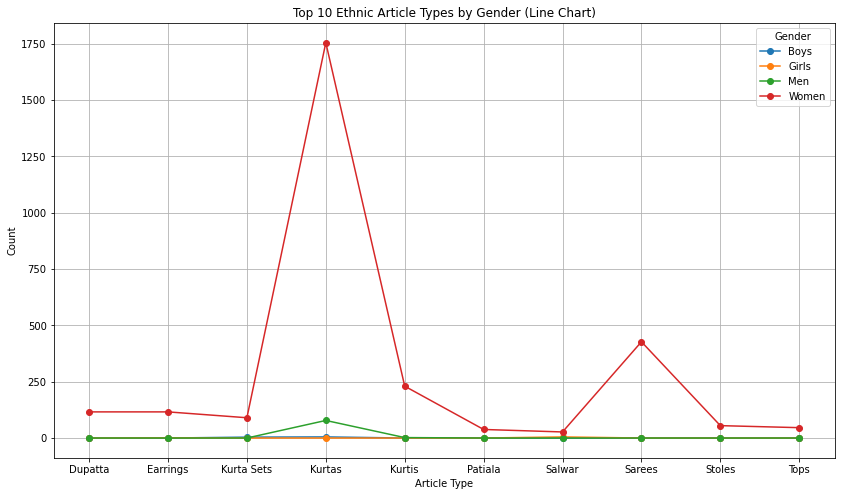

In [233]:
#ethinic-usage with top10 articleType and gender
ethnic_df = df[df['usage'] == 'Ethnic']
grp_df = ethnic_df.groupby(['articleType', 'gender']).size().reset_index(name='Count')

#top 10 article types 
top_10_article_types = grp_df.groupby('articleType')['Count'].sum().nlargest(10).index
top_10_grp_df = grp_df[grp_df['articleType'].isin(top_10_article_types)]
pivot_table = top_10_grp_df.pivot(index='articleType', columns='gender', values='Count').fillna(0)

# Plotting
plt.figure(figsize=(14, 8))
for gender in pivot_table.columns:
    plt.plot(pivot_table.index, pivot_table[gender], marker='o', label=gender)
plt.title('Top 10 Ethnic Article Types by Gender (Line Chart)')
plt.xlabel('Article Type')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.grid(True)
plt.show()

Observation: Kurtas are most worn in almost every gender.

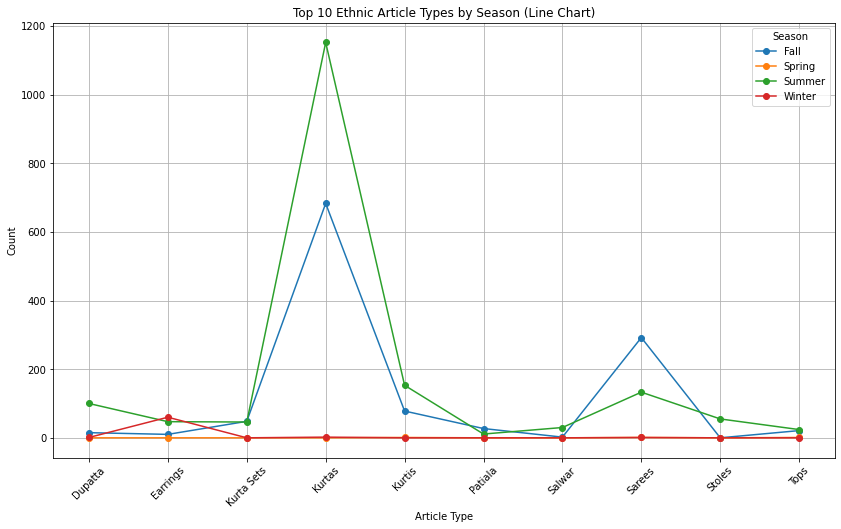

In [234]:
grp_df = ethnic_df.groupby(['articleType', 'season']).size().reset_index(name='Count')

# Identify the top 10 article types by total count
top_10_article_types = grp_df.groupby('articleType')['Count'].sum().nlargest(10).index

# Filter the grouped data to include only the top 10 article types
top_10_grp_df = grp_df[grp_df['articleType'].isin(top_10_article_types)]

# Create a pivot table with 'articleType' as index, 'season' as columns, and 'Count' as values
pivot_table = top_10_grp_df.pivot(index='articleType', columns='season', values='Count').fillna(0)

# Plot the pivot table as a line chart
plt.figure(figsize=(14, 8))
for season in pivot_table.columns:
    plt.plot(pivot_table.index, pivot_table[season], marker='o', label=season)

# Add labels and title
plt.title('Top 10 Ethnic Article Types by Season (Line Chart)')
plt.xlabel('Article Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Season')
plt.grid(True)
plt.show()

Observation:Kurtas are most worn in almost every season.

Rows with missing images:
          id gender masterCategory subCategory articleType baseColour  season  \
5941   39403    Men        Apparel     Topwear      Shirts      Black  Summer   
14484  39410    Men        Apparel     Topwear      Shirts      Cream  Summer   
28782  39401    Men        Apparel  Bottomwear       Jeans       Blue  Winter   
32464  39425    Men        Apparel     Topwear     Tshirts        Red  Spring   
35694  12347    Men        Apparel     Topwear       Suits        Red  Winter   

        usage                                 productDisplayName colorgroup  \
5941   Casual  U.S. Polo Assn. Men Black Tailored Fit Casual ...      Black   
14484  Casual  U.S. Polo Assn. Men Cream-Coloured Tailored Fi...      White   
28782  Casual  U.S. Polo Assn. Denim Co. Men Blue Slim Straig...       Blue   
32464  Casual               U.S. Polo Assn. Men Red Polo T-Shirt        Red   
35694  Casual  Fastrack Men Red Manhattan Regular Fit Solid F...        Red   

            